## First Attempt at building a deepsets architecture

In [10]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

#### Experimenting with input sizes

In [4]:
# For DECAM, BASS, MzLS
with open('../bricks_data/pixel2ccd_2048_non_inclusive.pickle', 'rb') as f:
    subpixel2ccd_dict = pickle.load(f)
    f.close()

In [5]:
print(len(subpixel2ccd_dict))

28536897


In [7]:
min = 1000
max = 0
aggregate = 0
c30 = 0
c100 = 0
c500 = 0
c1000 = 0
lens = np.zeros(len(subpixel2ccd_dict))

for i,pix in enumerate(subpixel2ccd_dict.keys()):
    no_ccds = len(subpixel2ccd_dict[pix])
    lens[i]
    aggregate += no_ccds
    if no_ccds > 30:
        c30 += 1
        if no_ccds > 100:
            c100 += 1
            if no_ccds > 500:
                c500 += 1
                if no_ccds > 1000:
                    c1000 += 1
    if no_ccds > max:
        max = no_ccds
    if no_ccds < min:
        min = no_ccds

print("Mean CCD's per subpixel:", aggregate/len(subpixel2ccd_dict))
print("Max CCD's per subpixel:", max)
print("Min CCD's per subpixel:", min)
print("Pixels with more than 30 CCDs: ", c30)
print("Pixels with more than 100 CCDs: ", c100)
print("Pixels with more than 500 CCDs: ", c500)
print("Pixels with more than 1000 CCDs: ", c1000)

Mean CCD's per subpixel: 14.685108966122
Max CCD's per subpixel: 2978
Min CCD's per subpixel: 1
Pixels with more than 30 CCDs:  2065852
Pixels with more than 100 CCDs:  39613
Pixels with more than 500 CCDs:  31431
Pixels with more than 1000 CCDs:  6968


In [8]:
lens = np.zeros(len(subpixel2ccd_dict))

for i,pix in enumerate(subpixel2ccd_dict.keys()):
    lens[i] = len(subpixel2ccd_dict[pix])

(array([26122277.,  2267658.,   107349.]),
 array([  0,  30,  50, 100]),
 <BarContainer object of 3 artists>)

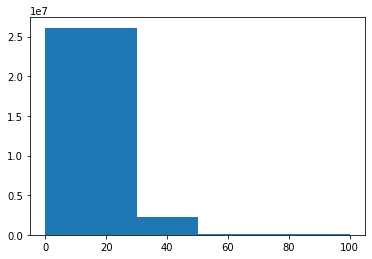

In [13]:
plt.hist(lens, bins=[0,30,50,100])

## Building a deepsets architecture